# Реализация алгоритма KMeans

In [3]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Создание массива точек. KMeans из klearn.cluster

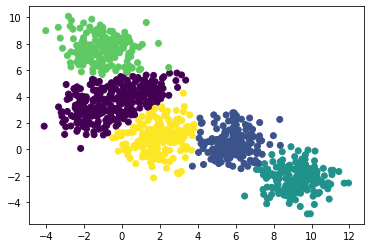

In [360]:
from sklearn.datasets import make_blobs
X,y = make_blobs (n_samples=1000,n_features=2,centers=6,random_state=0)
x=np.array(X)
# Демонстрация работы встроенной функции (для сравнения с моими реализациями данного алгоритма)
from sklearn.cluster import KMeans
a = KMeans (n_clusters=5,random_state=0).fit_predict(X)
plt.scatter(X[:,0],X[:,1],c=a)

## Алгоритм KMeans со случайным выбором центров из существующих точек

In [246]:

def cent(x,p,CV,K):
    count=0
    for j in range(K):
        CV[j]=[0,0] 
        for i in range (np.size(x[:,0])):
            if (p[i]==j):
                count+=1
                CV[j]+=x[i]
        if (count != 0):
            CV[j]/=count
            count=0
    return CV
def KM(K,x):
    C=np.random.permutation(np.size(x[:,0]))
    C=C[0:K]
    CP=np.array(x[C])
    p=[np.argmin(np.array([np.linalg.norm(x[i]-CP[j]) for j in range(K)]))  for i in range(np.size(x[:,0]))]
    CV=np.array(CP)
    cent(x,p,CV,K) 
    it=0
    while (np.any(CV!=CP)):
        it+=1
        CP=np.array(CV)
        p=[np.argmin(np.array([np.linalg.norm(x[i]-CP[j]) for j in range(K)]))  for i in range(np.size(x[:,0]))]
        cent(x,p,CV,K)
    print ("Количество итераций ", it)
    return p

Количество итераций  4
Время работы 0.18347644805908203


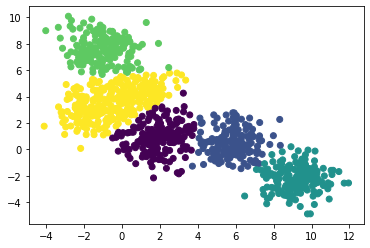

In [249]:
from time import time
t=time()
p=KM(5,x)
print("Время работы", time()-t)
plt.scatter(x[:,0],x[:,1],c=p) 

## Алгоритм KMeans со случайным выбором центров

In [251]:
def KM_s(K,x):
    CP=np.random.sample((K, 2))
    p=[np.argmin(np.array([np.linalg.norm(x[i]-CP[j]) for j in range(K)]))  for i in range(np.size(x[:,0]))]
    CV=np.array(CP)
    cent(x,p,CV,K) 
    it=0
    while (np.any(CV!=CP)):
        it+=1
        CP=np.array(CV)
        p=[np.argmin(np.array([np.linalg.norm(x[i]-CP[j]) for j in range(K)]))  for i in range(np.size(x[:,0]))]
        cent(x,p,CV,K)
    print ("Количество итераций ", it)
    return p

Время работы 0.3241713047027588


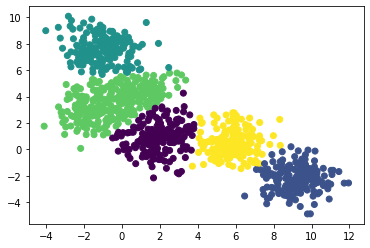

In [57]:
t=time()
p=KM_s(5,x)
print("Время работы", time()-t)
plt.scatter(x[:,0],x[:,1],c=p) 

## Работа с большими объемами данных (n_samples=3000)

- _При работе с большими объемами данных функции сходятся примерно к одинаковым кластерам, функция KM работает быстрее, чем KM_s_
- _При увеличении числа точек в 10 раз время увеличивается в 12-15 раз_


In [223]:
X,y = make_blobs (n_samples=300,n_features=2,centers=8,random_state=0)
x=np.array(X)
t=time()
p=KM_s(5,x)
print("Время работы KM_s при n=300", time()-t)
t=time()
p=KM(5,x)
print("Время работы KM при n=300", time()-t)

Количество итераций  7
Время работы KM_s при n=300 0.18051719665527344
Количество итераций  6
Время работы KM при n=300 0.16256403923034668


Количество итераций  23
Время работы 2.6953248977661133


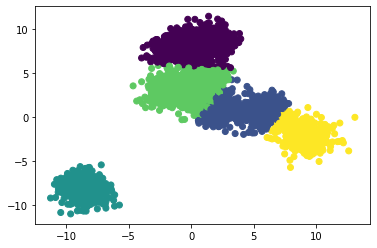

In [220]:
X,y = make_blobs (n_samples=3000,n_features=2,centers=8,random_state=0)
x=np.array(X)
t=time()
p=KM_s(5,x)
print("Время работы", time()-t)
plt.scatter(x[:,0],x[:,1],c=p) 

Количество итераций  16
Время работы 1.822925329208374


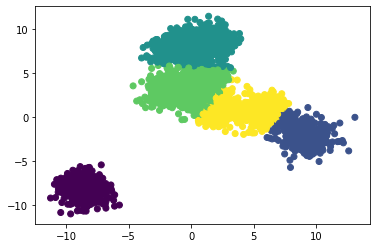

In [222]:
t=time()
p=KM(5,x)
print("Время работы", time()-t)
plt.scatter(x[:,0],x[:,1],c=p) 

## Далеко расположенные кластеры 

_Если скопления точек расположены далеко друг от друга, функция КМ может допускаtn ошибки чаще, чем KM_s_

Количество итераций  3
Время работы 0.007358074188232422


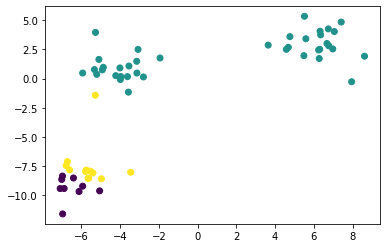

In [339]:
X,y = make_blobs (n_samples=60,n_features=2,centers=3,random_state=17)
x=np.array(X)
t=time()
p=KM(3,x)
print("Время работы", time()-t)
plt.scatter(x[:,0],x[:,1],c=p) 

Количество итераций  3
Время работы 0.008978128433227539


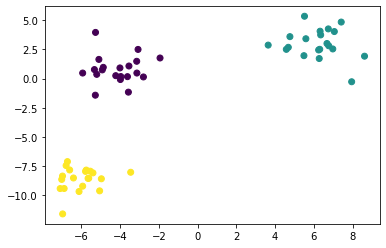

In [347]:
t=time()
p=KM_s(3,x)
print("Время работы", time()-t)
plt.scatter(x[:,0],x[:,1],c=p) 

## Рассеянные точки

Количество итераций  5
Время работы 0.043914794921875


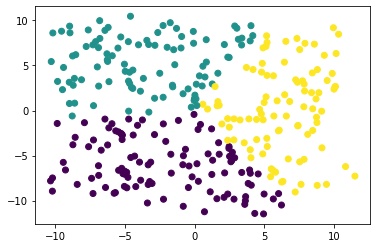

In [18]:
X,y = make_blobs (n_samples=300,n_features=2,centers=200,random_state=0)
x=np.array(X)
t=time()
p=KM(3,x)
print("Время работы", time()-t)
plt.scatter(x[:,0],x[:,1],c=p) 

Количество итераций  3
Время работы 0.03490591049194336


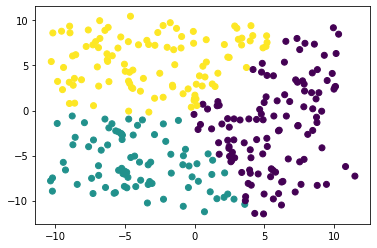

In [19]:
t=time()
p=KM_s(3,x)
print("Время работы", time()-t)
plt.scatter(x[:,0],x[:,1],c=p) 

### Сравнение при разной инициализации центров



- Если скопления точек расположены далеко друг от друга, и точки в них лежат не плотно, то алгоритм со случайной инициализацией центров работет точнее, чем алгоритм со случайным выбором центров, так как изначально два центра могут лежать рядом
- Алгоритм с выбором центров из точек в среднем сходится немного быстрее


In [20]:
def KM(K,x):
    C=np.random.permutation(np.size(x[:,0]))
    C=C[0:K]
    CP=np.array(x[C])
    p=[np.argmin(np.array([np.linalg.norm(x[i]-CP[j]) for j in range(K)]))  for i in range(np.size(x[:,0]))]
    CV=np.array(CP)
    cent(x,p,CV,K) 
    it=0
    while (np.any(CV!=CP)):
        it+=1
        CP=np.array(CV)
        p=[np.argmin(np.array([np.linalg.norm(x[i]-CP[j]) for j in range(K)]))  for i in range(np.size(x[:,0]))]
        cent(x,p,CV,K)
    return p
def KM_s(K,x):
    CP=np.random.sample((K, 2))
    p=[np.argmin(np.array([np.linalg.norm(x[i]-CP[j]) for j in range(K)]))  for i in range(np.size(x[:,0]))]
    CV=np.array(CP)
    cent(x,p,CV,K) 
    it=0
    while (np.any(CV!=CP)):
        it+=1
        CP=np.array(CV)
        p=[np.argmin(np.array([np.linalg.norm(x[i]-CP[j]) for j in range(K)]))  for i in range(np.size(x[:,0]))]
        cent(x,p,CV,K)
    return p

## Среднее время работы

In [34]:
X,y = make_blobs (n_samples=1000,n_features=2,centers=3,random_state=17)
x=np.array(X)
T=0
count=150
for i in range (count):
    t=time()
    p=KM(3,x)
    T+=time()-t
print(count)
print(T)
print("Среднее время работы функции KM для выбоорки из 1000 точек ",T/count)

150
25.16826605796814
Среднее время работы функции KM для выбоорки из 1000 точек  0.16778844038645427


In [35]:
T=0
count=150
for i in range (count):
    t=time()
    p=KM_s(3,x)
    T+=time()-t
print(count)
print(T)
print("Среднее время работы функции KM_s для выбоорки из 1000 точек ",T/count)

150
27.098835706710815
Среднее время работы функции KM_s для выбоорки из 1000 точек  0.18065890471140544


# Попытка придумать способ определения количества кластеров

Идея:
Перебирать k - количество кластеров от 2 до некторого N.
Ставить в соответствие каждому k число или вектор - х по определенному правилу, (х) характеризует удачно или неудачно кластеризированны точки (х можно вычислять на основе меж- и внутрикластерных расстояний).

Внутриклассовое расстояния - максимум между центром и самой отдаленной точкой кластера. 
Межкласстерные расстояние - среднее значение расстояний между данным класстером и точками, ему не принадлежащими

## Определение внутрикластерного расстояния

3.766044268131029


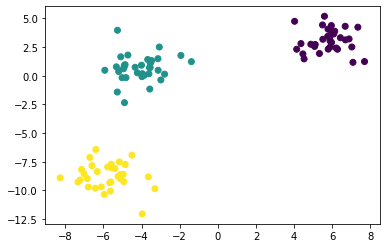

In [205]:
K=3
X,y = make_blobs (n_samples=100,n_features=2,centers=3,random_state=17)
x=np.array(X)
p=KM(K,x)
plt.scatter(x[:,0],x[:,1],c=p) 
C=np.random.sample((K, 2))
C=cent(x,p,C,K)
j=2
m=np.max(np.array([np.linalg.norm(x[i]-C[j]) for i in range(np.size(x[:,0])) if p[i]==j]))
print(m)

## Визуализация

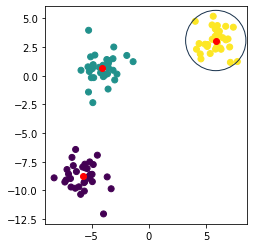

In [38]:

input_list = [{'x':C[j,0],'y':C[j,1],'radius':m,'color':(0.1,0.2,0.3)}]     
output_list = []   
for point in input_list:
    output_list.append(plt.Circle((point['x'], point['y']), point['radius'], color=point['color'], fill=False))
ax = plt.gca(aspect='equal')
ax.cla()

for circle in output_list:    
   ax.add_artist(circle)
plt.scatter(x[:,0],x[:,1],c=p) 
plt.scatter(C[:,0],C[:,1],c="red") 

## Попытка реализовать данный алгоритм

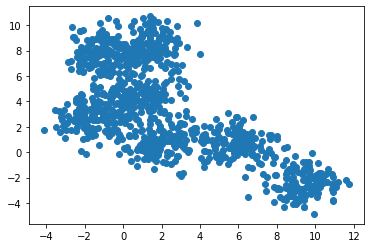

In [207]:
def ff(K,x):
    p=KM(K,x)
    C=np.random.sample((K, 2))
    C=cent(x,p,C,K)
    vn=np.array([np.max(np.array([np.linalg.norm(x[i]-C[j]) for i in range(np.size(x[:,0])) if p[i]==j])) for j in range(K)])
    me=np.array([np.min(np.array([np.linalg.norm(x[i]-C[j]) for i in range(np.size(x[:,0])) if p[i]!=j])) for j in range(K)])
    vn+=0.00000000001
    Z=me/(vn)
    return np.linalg.norm(Z)    
def countk(x):
    v=np.array([ff(i+2,x) for i in range(7)])
    count=np.argmax(v)
    return count+2
KK=7
X,y = make_blobs (n_samples=1000,n_features=2,centers=KK,random_state=0)
x=np.array(X)
p=KM(KK,x)
plt.scatter(x[:,0],x[:,1]) 

In [194]:
l=0
pov=6
for i in range(pov):
    l+=countk(x)
KKL=l//pov
print ("Оптимальное количество кластеров: ",KKL)

Оптимальное количество кластеров:  7


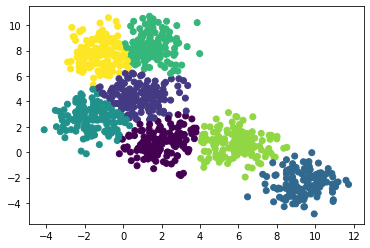

In [195]:
a = KMeans (n_clusters=KKL,random_state=0).fit_predict(X)
plt.scatter(X[:,0],X[:,1],c=a)

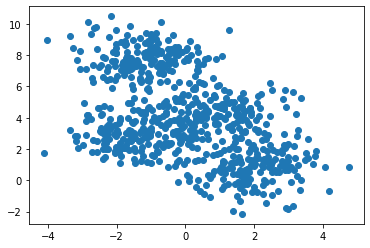

In [202]:
KK=4
X,y = make_blobs (n_samples=700,n_features=2,centers=KK,random_state=0)
x=np.array(X)
p=KM(KK,x)
plt.scatter(x[:,0],x[:,1]) 

In [203]:
l=0
pov=6
for i in range(pov):
    l+=countk(x)
KKL=l//pov
print ("Оптимальное количество кластеров: ",KKL)

Оптимальное количество кластеров:  8


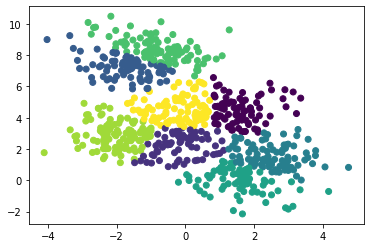

In [198]:
a = KMeans (n_clusters=KKL,random_state=0).fit_predict(X)
plt.scatter(X[:,0],X[:,1],c=a)

# Визуализация матрицы попарных расстояний

- _Для упорядочивания матрицы попарных расстояний, проводится кластеризация точек, а затем их упорядочивание в зависимости от принадлежности точки к тому или иному кластеру_
- _В свою очередь точки кринадлежащие одному кластеру могут быть повторно кластеризированны, тем замым делая матрицу попарных расстояний еще болееупорядоченной_

### Визуализация неупорядоченной матрицы попарных расстояний

Количество итераций  3


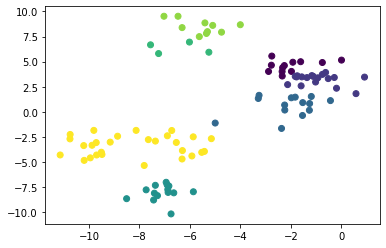

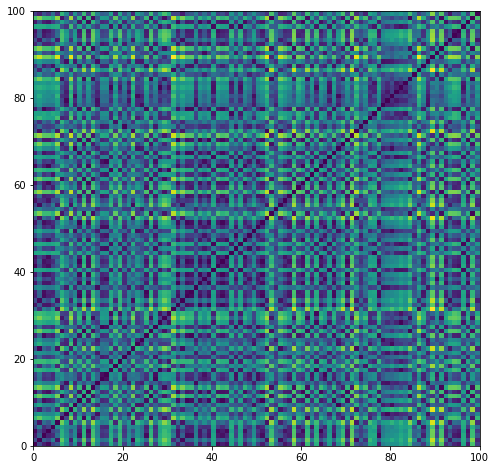

In [342]:
X,y = make_blobs (n_samples=100,n_features=2,centers=KK,random_state=1)
x=np.array(X)
p=KM(KK,x)
plt.scatter(X[:,0],X[:,1],c=p)
c = [[ np.linalg.norm(x[i]-x[j]) for i in range(np.size(x[:,0]))] for j in range(np.size(x[:,0]))]
fig, ax = plt.subplots()

ax.pcolormesh(c)

fig.set_figwidth(8)    #  ширина и
fig.set_figheight(8)    #  высота "Figure"

plt.show()
up= [[ np.linalg.norm(x[i]-x[j]) for i in range(np.size(x[:,0]))] for j in range(np.size(x[:,0]))]

### Визуалицация упордоченной матрицы попарных расстояний

25


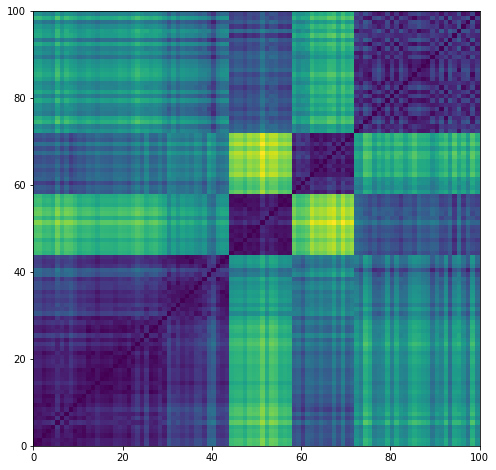

In [343]:

sp=np.argsort(p)

x0 = np.where(sp == 4)
print(x0[0][0])
c = [[ np.linalg.norm(x[sp[i]]-x[sp[j]]) for i in range(np.size(x[:,0]))] for j in range(np.size(x[:,0]))]
fig, ax = plt.subplots()

             
ax.pcolormesh(c)

fig.set_figwidth(8)    #  ширина и
fig.set_figheight(8)    #  высота "Figure"

plt.show()